<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv', index_col = 0)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


**The following describes the dataset variables:**

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

**For all visualizations, please include a title in each graph and appropriate labels**

Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a boxplot

- Provide a  bar plot for the Charles river variable

- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a histogram for the pupil to teacher ratio variable

**For each of the following questions;**

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

- State your hypothesis.

- Use α = 0.05

- Perform the test Statistics.

- State the conclusion from the test.

In [9]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import statsmodels.api as sm
import scipy.stats as sp

## Dataset

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [90]:
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_GROUP'] = 'Bounded'
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_GROUP'] = 'Unbounded'

----

Text(0, 0.5, 'Median of owner-occupied homes')

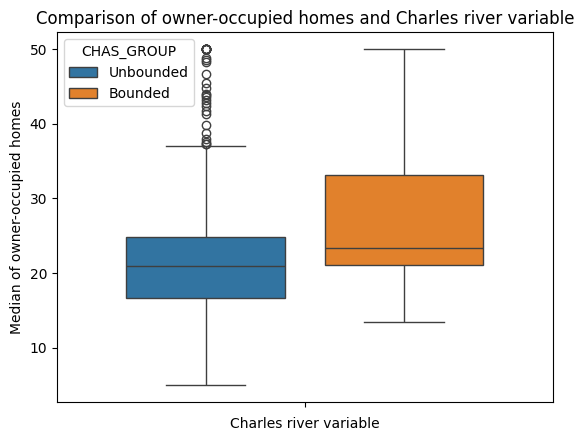

In [92]:
# For the "Median value of owner-occupied homes" provide a boxplot
f1 = sns.boxplot(data = boston_df, y = 'MEDV', hue = 'CHAS_GROUP', gap = 0.2)
f1.set_title('Comparison of owner-occupied homes and Charles river variable')
f1.set_xlabel('Charles river variable')
f1.set_ylabel('Median of owner-occupied homes')

In [51]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
s, p = sp.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center = 'mean')
print(f' P-value : {p}')

 P-value : 0.003238119367639829


From the Levene's test we can reject the null hypothesis due to the p value lower than 0.05.


In [45]:
sp.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

After found out that the p value is equal to 0.00356 which lower than the (α = 0.05)
Therefore, we can conclude that there are significant difference between median value of houses bounded and the Charles river.

----

Text(0, 0.5, 'Amount of household')

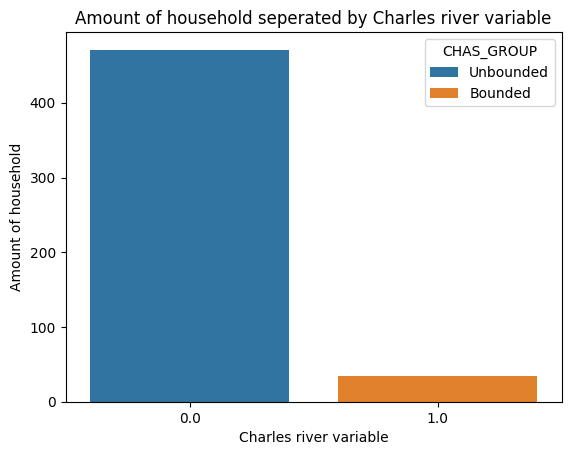

In [93]:
# Provide a bar plot for the Charles river variable
f2 = sns.countplot(x = boston_df['CHAS'], hue = boston_df['CHAS_GROUP'])
f2.set_title('Amount of household seperated by Charles river variable')
f2.set_xlabel('Charles river variable')
f2.set_ylabel('Amount of household')

----

Text(0, 0.5, 'Median of owner-occupied homes')

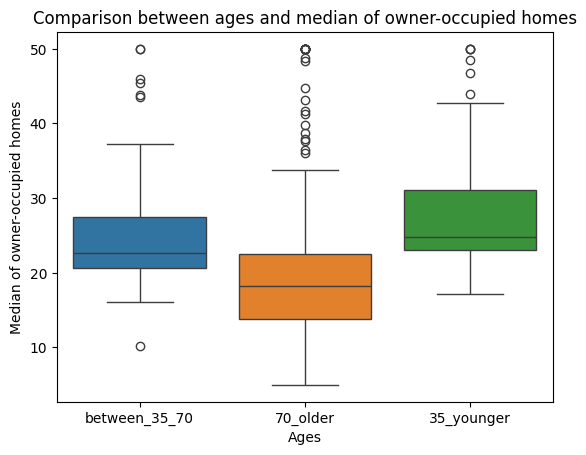

In [94]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

# Seperating ages into groups
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70_older'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between_35_70'
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35_younger'

#plotting boxplot
f3 = sns.boxplot(data = boston_df, x = 'AGE_GROUP', y = 'MEDV', hue = 'AGE_GROUP')
f3.set_title('Comparison between ages and median of owner-occupied homes')
f3.set_xlabel('Ages')
f3.set_ylabel('Median of owner-occupied homes')

In [48]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
sp.levene(boston_df[boston_df['AGE_GROUP'] == '35_younger']['MEDV'],
          boston_df[boston_df['AGE_GROUP'] == '70_older']['MEDV'],
          boston_df[boston_df['AGE_GROUP'] == 'between_35_70']['MEDV'], center = 'mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

We can conclude that the three populations mean are equal due to the p value.

----

Text(0, 0.5, 'Nitrogen Oxide concentration (%)')

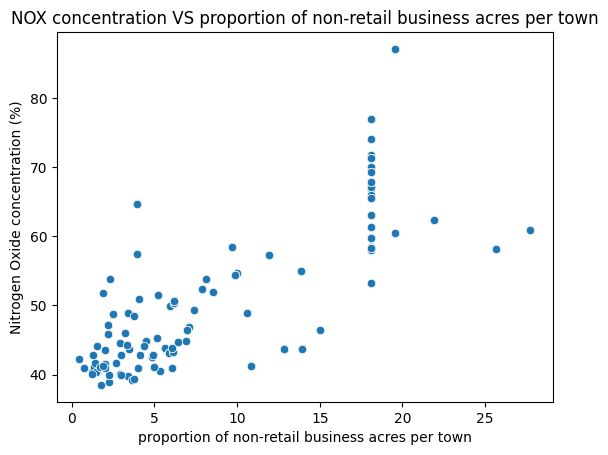

In [102]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
f4 = sns.scatterplot(x = boston_df['INDUS'], y = boston_df['NOX']*100)
f4.set_title('NOX concentration VS proportion of non-retail business acres per town')
f4.set_xlabel('proportion of non-retail business acres per town')
f4.set_ylabel('Nitrogen Oxide concentration (%)')

In [60]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# Null Hypothesis  ->  There are no relationship between INDUS and NOX.
# Alternative Hypothesis  ->  There are relationship between INDUS and NOX.
sp.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

Since the p value (7.91e-98) < 0.05 ; we reject the Null Hypothesis and conclude that there are relationship between these two variables

----

Text(0, 0.5, 'Frequency of pupil to teacher ratio')

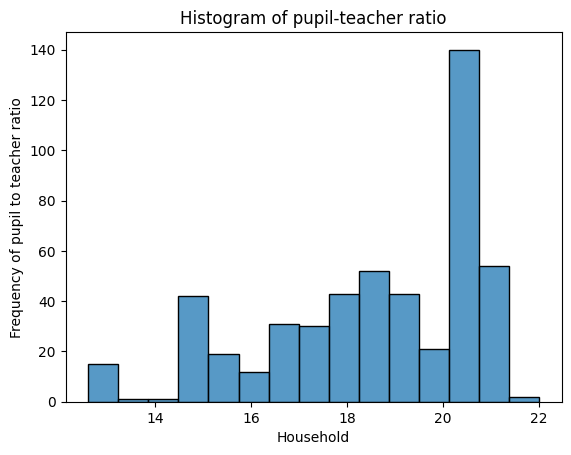

In [104]:
# Create a histogram for the pupil to teacher ratio variable
f5 = sns.histplot(data = boston_df, x = 'PTRATIO', bins = 15)
f5.set_title('Histogram of pupil-teacher ratio')
f5.set_xlabel('Household')
f5.set_ylabel('Frequency of pupil to teacher ratio')

----

<Axes: xlabel='DIS', ylabel='MEDV'>

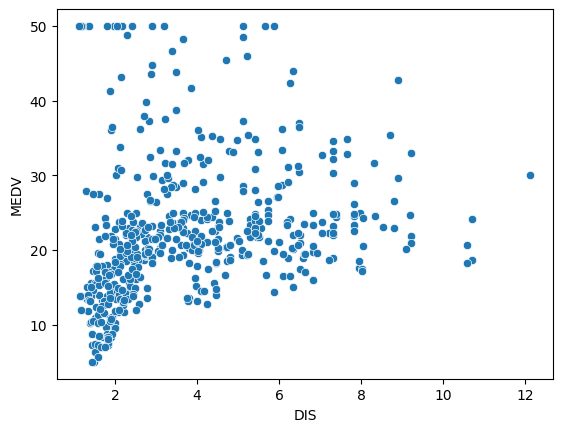

In [80]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
# Null Hypothesis  ->  There are no relationship between DIS and MEDV.
# Alternative Hypothesis  ->  There are relationship between DIS and MEDV.

x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x)
f6 = sns.scatterplot(data = boston_df, x = 'DIS', y = 'MEDV')
f6.set_title('Histogram of pupil-teacher ratio')
f6.set_xlabel('Household')
f6.set_ylabel('Frequency of pupil to teacher ratio')

In [81]:
model = sm.OLS(y, x).fit()
preictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        13:57:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p value (1.21e-8) is less than 0.05 then we can reject the null hypothesis. Therefore we can conclude that there are relationship between DIS and MEDV which has DIS coefficient of 1.0916.